In [1]:
from fastai import *
from fastai.vision import *

In [2]:

folder = 'bored'
file = 'urls_bored.txt'

In [7]:

folder = 'surprise'
file = 'urls_surprise.txt'

In [12]:
folder = "angry"
file = "urls_angry.txt"

In [16]:

folder = 'happy'
file = 'urls_happy.txt'

In [17]:
path = Path('data/emotion')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [18]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/surprise')]

In [99]:
print(dest/file)

data\emotion\surprise\urls_suprise.txt


In [21]:
classes = ['bored','surprise','angry','happy']

In [14]:
path.ls()

[WindowsPath('data/emotion/angry'),
 WindowsPath('data/emotion/bored'),
 WindowsPath('data/emotion/happy'),
 WindowsPath('data/emotion/surprise')]

In [19]:
download_images(dest/file,dest, max_pics=500)

In [22]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

bored


surprise


angry


happy


In [23]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [24]:
data.classes

['angry', 'bored', 'happy', 'surprise']

In [ ]:
np.zeros(shape=(48,48))

In [ ]:
data.show_batch(rows=3, figsize=(20,20))

In [26]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to C:\Users\chiaming/.cache\torch\checkpoints\resnet34-333f7ec4.pth
100%|█████████████████████████████████████████████████████████████████████████████| 83.3M/83.3M [00:34<00:00, 2.51MB/s]


In [28]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.572298,1.256997,0.412568,12:28
1,1.383128,1.256673,0.439891,12:30
2,1.229685,1.155918,0.442623,12:34


In [29]:
learn.save('stage-1')

In [30]:
learn.unfreeze()

In [31]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


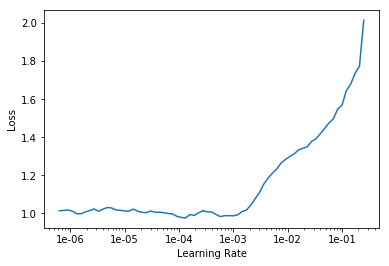

In [32]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(1, max_lr=slice(6e-4,8e-4))

epoch,train_loss,valid_loss,error_rate,time
0,1.118204,1.317302,0.420765,10:34


In [35]:
interp = ClassificationInterpretation.from_learner(learn)

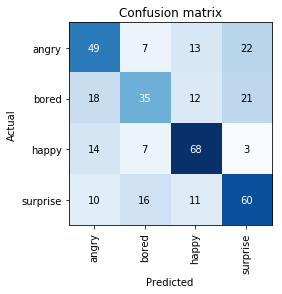

In [39]:
interp.plot_confusion_matrix()

In [42]:
print("正確率:"+str((49+35+68+60)/(92+97+179)))

正確率:0.5760869565217391


In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


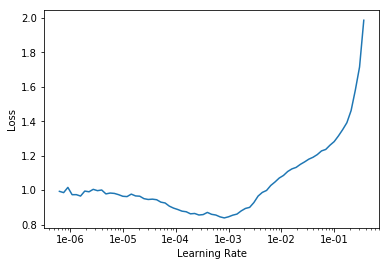

In [43]:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [44]:
interp = ClassificationInterpretation.from_learner(learn)

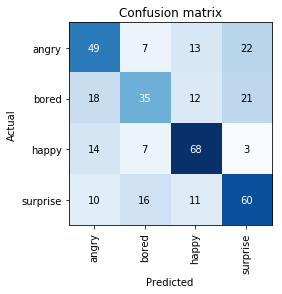

In [45]:
interp.plot_confusion_matrix()